In [1]:
#loading all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

E:\python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#Reading the file
dln=pd.read_csv("loan.csv")

In [3]:
#Checking the dataset
dln.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Checking null values
dln.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Checking datatypes
dln.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#checking the shape of the dataset
dln.shape

(614, 13)

In [7]:
#Removing null values in each column
for col in dln.columns:
    if dln[col].dtype==object:
        dln[col].fillna(dln[col].mode().values[0],inplace=True)
    else :
         dln[col].fillna(dln[col].mean(),inplace=True)

In [8]:
dln.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#we can remove column loan id as it is different for each customer and it doesnt help in analysis
dln.drop('Loan_ID',axis=1,inplace=True)

In [10]:
#As datatype is object we are using Label Encoder
le=LabelEncoder()
for col in dln.columns:
    if dln[col].dtype==object:
        dln[col]=le.fit_transform(dln[col])

In [11]:
dln.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


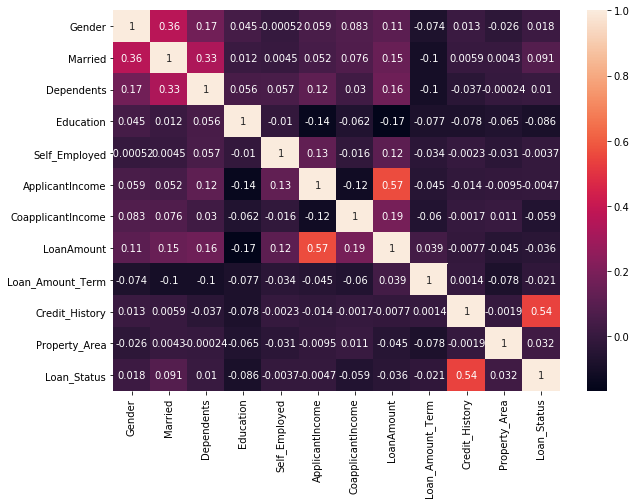

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(dln.corr(),annot=True)

In [13]:
x=dln.iloc[:,:-1]

In [14]:
y=dln.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [15]:
#using standard scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [16]:
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 40 is 0.8373983739837398
accuracy_score: 41 is 0.8048780487804879
accuracy_score: 42 is 0.7886178861788617
accuracy_score: 43 is 0.8048780487804879
accuracy_score: 44 is 0.8292682926829268
accuracy_score: 45 is 0.7723577235772358
accuracy_score: 46 is 0.8373983739837398
accuracy_score: 47 is 0.8130081300813008
accuracy_score: 48 is 0.7642276422764228
accuracy_score: 49 is 0.8211382113821138
accuracy_score: 50 is 0.7886178861788617
accuracy_score: 51 is 0.8292682926829268
accuracy_score: 52 is 0.8211382113821138
accuracy_score: 53 is 0.7723577235772358
accuracy_score: 54 is 0.8373983739837398
accuracy_score: 55 is 0.7317073170731707
accuracy_score: 56 is 0.8373983739837398
accuracy_score: 57 is 0.7967479674796748
accuracy_score: 58 is 0.8130081300813008
accuracy_score: 59 is 0.8130081300813008
accuracy_score: 60 is 0.8130081300813008
accuracy_score: 61 is 0.8211382113821138
accuracy_score: 62 is 0.8211382113821138
accuracy_score: 63 is 0.8780487804878049
accuracy_score: 

In [17]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.2)

In [18]:
KNN=KNeighborsClassifier(n_neighbors=6)
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=6)
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100,random_state=55)
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))

In [19]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc auc score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
  


************************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


accuracy_score= 0.7804878048780488


Cross_val_score= 0.7688260179799048


roc auc score= 0.7175324675324675


Classification report
               precision    recall  f1-score   support

           0       0.62      0.57      0.60        35
           1       0.84      0.86      0.85        88

    accuracy                           0.78       123
   macro avg       0.73      0.72      0.72       123
weighted avg       0.78      0.78      0.78       123



[[20 15]
 [12 76]]


************************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=

In [20]:
#Checking all classifiers cross val score and roc_auc_score
result=pd.DataFrame({'Model': Model, 'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,78.048780,76.882602,71.753247
1,SVC,86.991870,80.462718,78.003247
2,LogisticRegression,87.804878,80.795875,78.571429
3,DecisionTreeClassifier,73.170732,72.982549,69.204545
4,GaussianNB,85.365854,79.328398,77.727273
5,RandomForestClassifier,85.365854,78.680592,77.727273


In [21]:
joblib.dump(lr,'Model_loanprediction.csv')

['Model_loanprediction.csv']

In [22]:
model=joblib.load('Model_loanprediction.csv')
model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
#Conclusion:
#As there are null values in the dataset, i have used column "mode" to fill NaN values for object datatype and column "mean" for int dataype
#As per the correlation heatmap there is no negatively correlating with target
#It is always good to input Standard scaled data to the model  i have used standard scaling technique to the data
#As per analysis of models, LogisticRegression is the best model for this dataset as it having high accuracy score and cross val score and roc_auc_score